In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader

In [2]:
#pip install torchvision

In [3]:
from torchvision import datasets, transforms

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root='../DATA/Pytorch-Data', train=True, download=True, transform= transform)

In [6]:
test_data = datasets.MNIST(root='../DATA/Pytorch-Data', train=False, download=True, transform= transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../DATA/Pytorch-Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../DATA/Pytorch-Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [10]:
image, label = train_data[0]

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

5

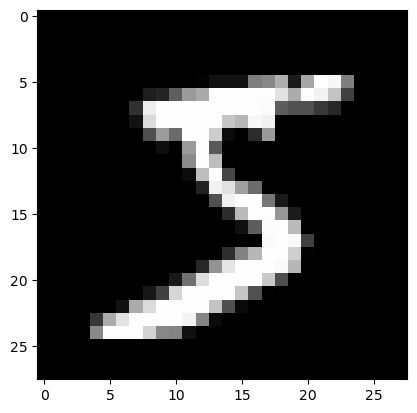

In [16]:
plt.imshow(image.reshape((28,28)), cmap='gray')

In [18]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle= False)

In [22]:
class Multilayerperceptron(nn.Module):
    
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        
    def forward(self, X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1)    
    

In [23]:
torch.manual_seed(101)
model = Multilayerperceptron()
model

Multilayerperceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
for param in model.parameters():
    
    print(param.numel())
    

94080
120
10080
84
840
10


In [28]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**To Get the 1st Batch**

In [31]:
for images,labels in train_loader:
    break

In [34]:
images.shape

torch.Size([100, 1, 28, 28])

**To Flattern the image (we have to convert the image from 2D to 1D)**

In [35]:
images.view(100,-1) # This -1 combines all the other values and convert into one

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [37]:
images.view(100,-1).shape

torch.Size([100, 784])

In [38]:
import time
start_time = time.time()

epochs = 10

# TRACKING
train_losses = []
test_losses = []
train_correct = []
test_correct = []




for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # RUN THE TRAIN BATCH and FIND LODD
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  
        loss = criterion(y_pred, y_train)
        
 
        
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        
        
        # BACK PROPAGATION
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        
        
        # PRINT INTERIM REPORT AND APPEND TRAINING LOSS
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    

    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    
    
    
    
    
    
    
    
    # RUN FOR TESTING BATCH
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.29955009  accuracy:  82.655%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.27258992  accuracy:  87.248%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.18161905  accuracy:  89.317%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.17174439  accuracy:  94.625%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.05148387  accuracy:  95.000%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.13953164  accuracy:  95.247%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.16613829  accuracy:  96.545%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.17245050  accuracy:  96.530%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.10881116  accuracy:  96.593%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.14730825  accuracy:  97.440%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.01311514  accuracy:  97.472%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.07650579  accuracy:  97.415%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.05287092  accuracy:  98.060%
epoch:  4  b